<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

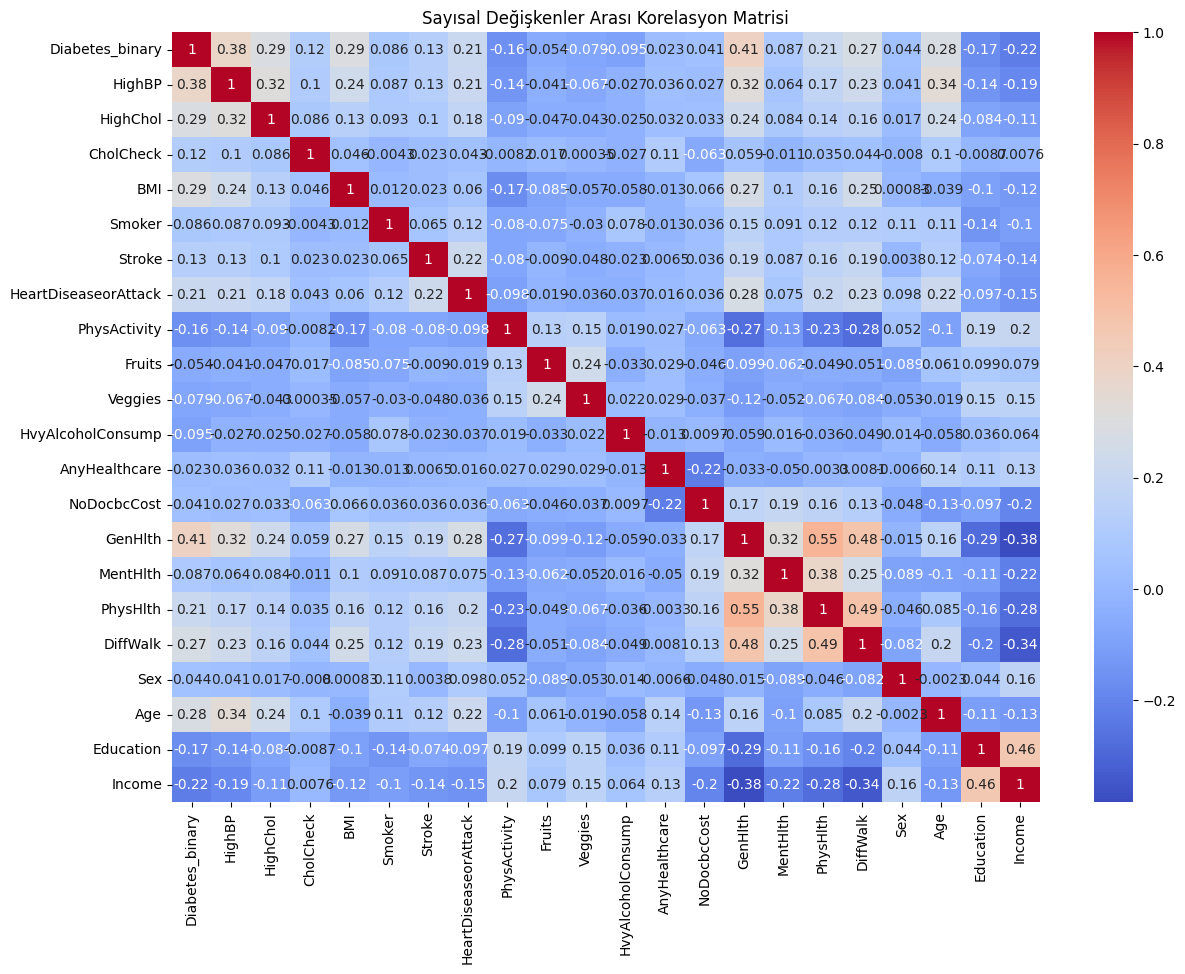

Logistic Regression
[[5156 1934]
 [1623 5426]]
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      7090
         1.0       0.74      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

ROC AUC: 0.7484880068815091
Random Forest
[[4914 2176]
 [1550 5499]]
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.73      7090
         1.0       0.72      0.78      0.75      7049

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139

ROC AUC: 0.7365997557696566
En iyi parametreler: {'max_depth': 10, 'n_estimators': 100}
En iyi doğruluk: 0.7498806429367143


In [3]:


# 1. Kütüphanelerin Yüklenmesi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# 2. Veriyi Yükleme
df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df.head()

# 3. Veri Yapısı ve Genel Bakış
df.info()
df.describe()
df.isnull().sum()


# 4. Hedef Değişken Dağılımı (Sınıf Dengesi)
df["Diabetes_binary"].value_counts()


# 5. Korelasyon Matrisi Görselleştirme
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Sayısal Değişkenler Arası Korelasyon Matrisi")
plt.show()


# 6. Özelliklerin ve Hedef Değişkenin Ayrılması
X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]


# 7. Verilerin Ölçeklendirilmesi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 8. Eğitim ve Test Verisine Ayırma
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


# 9. Logistic Regression Modeli ile Tahmin
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

print("Logistic Regression")
print(confusion_matrix(y_test, log_pred))
print(classification_report(y_test, log_pred))
print("ROC AUC:", roc_auc_score(y_test, log_pred))


# 10. Random Forest Modeli ile Tahmin
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print("ROC AUC:", roc_auc_score(y_test, rf_pred))

# 11. Random Forest için Hiperparametre Optimizasyonu (GridSearchCV)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

print("En iyi parametreler:", grid.best_params_)
print("En iyi doğruluk:", grid.best_score_)
